<AxesSubplot:title={'center':'Evolucion del Salario segun los Años de Experiencia'}, xlabel='YearsExperience'>

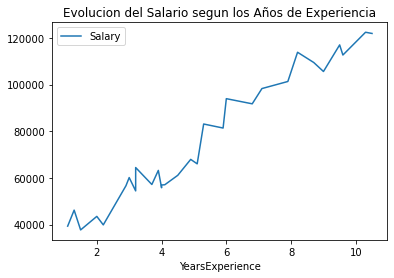

In [1]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


###############################################################################

### Data Preprocessing

###############################################################################

# Cargar dataset
df = pd.read_csv('D:\Personal\Maestria BigData\Módulo 7. Data mining, machine learning y deep learning\Datos\Salary_Data.csv')

# Visualizar los datos
df.plot(x='YearsExperience', y='Salary', title="Evolucion del Salario segun los Años de Experiencia") # Se ve relacion lineal

In [7]:
# Separacion en variables entrada/salida
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
###############################################################################
### Comprobacion del modelo
###############################################################################

#### P-Valores
# Ver p-valores
import statsmodels.api as sm
#X_train = sm.add_constant(X_train) # b0
#X_test = sm.add_constant(X_test) # b0
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              525.3
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                    2.64e-15
Time:                        17:09:25   Log-Likelihood:                         -219.36
No. Observations:                  20   AIC:                                      440.7
Df Residuals:                      19   BIC:                                      441.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.375e+04    600.077     22.920      0.000    1.25e+04     1.5e+04
==============================================================================
Omnibus:                        0.809   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.454
Skew:                          -0.361   Prob(JB):                        0.797
Kurtosis:                       2.843   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#### Linealidad
# Comprobacion de linealidad
import statsmodels.stats.api as sms
sms.linear_harvey_collier(model)
# p-valor = 0.272 > 0.05 -> No se rechaza H0=hay linearidad

Ttest_1sampResult(statistic=1.137603959747104, pvalue=0.272035496366901)

0.9576407903030607


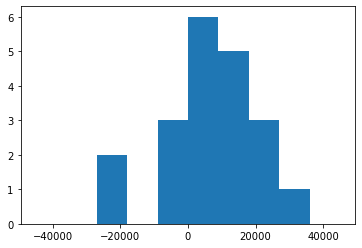

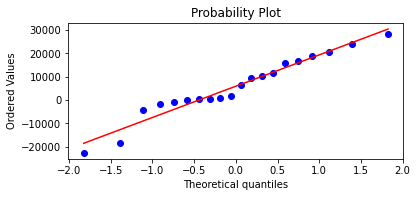

In [12]:
#### Normalidad Residuos
# Obtencion residuos
from statsmodels.compat import lzip
residuos = model.resid

# Histogramas
plt.hist(residuos, range=(-45000, 45000))

# Q-Q Plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuos, plot=ax, fit=True)
print(r**2)
# r^2 = 0.957
# Se ve normalidad

In [13]:
# Test D'Agostino
from scipy.stats import normaltest
normaltest(residuos)
# p-valor = 0.808 >> 0.05 -> No se rechaza H0=datos normales

NormaltestResult(statistic=0.8087058796668838, pvalue=0.6674085246421326)

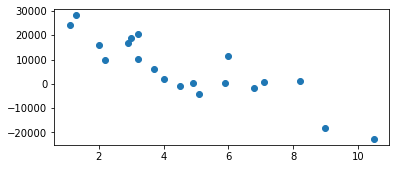

In [15]:
# Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# model.model.exog -> Parametros de entrada
# model.model.endog -> Parametros de salida
# p-valor=0.78 >> 0.05 -> No se puede rechazar H0=hay homocedasticidad

### Comprobacion Homocedasticidad
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(X_train, residuos)

In [16]:
### Autocorrelacion errores
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuos))
# Valor cercano a 2 -> No correlacion
# El valor esta acotado entre 0 (max. correlacion positiva) y 4 (max. correlacion negativa)

2.4556749654846404


In [17]:
### Comprobacion de influencia de posibles outliers
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]
# DFBetas da la diferencia en cada parametro estimado con y sin los puntos de influencia. Hay un DFBEta por cada
# datapoint; asi, con n observaciones y k variables hay n*k DFBEtas
# Se puede utilizar 2 o 2/sqrt(n) como umbral para ver que DFBetas son significativo y por lo tanto tienen mucha influencia 

array([[ 0.14429793],
       [-0.0620784 ],
       [ 0.1986409 ],
       [-0.01025913],
       [ 0.02700993]])

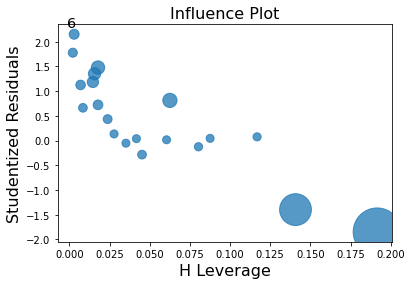

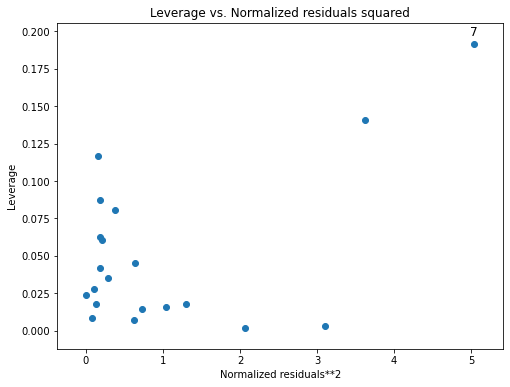

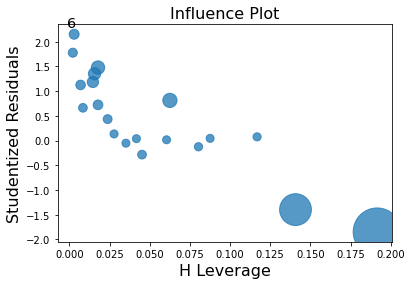

In [19]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)
influence_plot(model)
# Hay que tener cuidado con las observaciones que tengan un leverage alto y unos residuos altos ya que son las que mas
# van a estar influyendo en el modelo
# En el diagrama de influencia no se aprecia nada en el cuadrante superior derecho, pero en el de los residuos
# al cuadrado se observa como la observacion 7 (x=10.5) influye sensiblemente en la generalidad del modelo
# como es un problema ejemplo se va a dejar aunque se deberia tener precaucion con ella

In [21]:
# predicciones de la salida
y_pred = model.predict(X_test)
y_pred

array([ 20630.47442402, 141662.59104493,  56389.96342565,  53639.23350245,
       130659.67135212, 119656.75165931, 132035.03631372,  55014.59846405,
        72894.34296487, 108653.8319665 ])

In [22]:
# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)
# R2 remarca la explicabilidad del modelo. Cuanto mas cercano sea a 1 el modelo consigue
# explicar/expresar mejor los datos. Valor entre 0 y 1.
# 0.8111 es buen resultado -> 81.1% explicado

r2:  0.8111465166115928 mae:  158298192.7350815


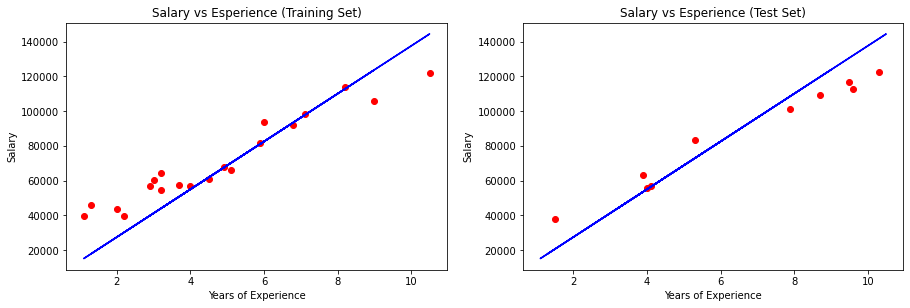

In [27]:
# Visualizing the Training results
plt.subplots(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red') #Pinto en rojo los valores reales de train como puntos
plt.plot(X_train, model.predict(X_train), color = 'blue') #Pinto en azul y en forma de linea la predicción sobre mis valores de train ya que aplico la regresión sobre esos mismos valores de train, mi modelo entrenado sobre esos valores
plt.title('Salary vs Esperience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

#Visualizando resultados de test
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red') #Pinto ahora los puntos de test sobre el mismo modelo que he construido para validarlo
plt.plot(X_train, model.predict(X_train), color = 'blue') #Pinto en azul y en forma de linea la predicción sobre mis valores de train ya que aplico la regresión sobre esos mismos valores de train, mi modelo entrenado sobre esos valores
plt.title('Salary vs Esperience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
### Añadiendo un b0
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # b0
X_test = sm.add_constant(X_test) # b0
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     273.2
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.51e-12
Time:                        17:33:10   Log-Likelihood:                -202.60
No. Observations:                  20   AIC:                             409.2
Df Residuals:                      18   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.682e+04   3033.148      8.841      0.000    2.04e+04    3.32e+04
x1          9345.9424    565.420     16.529      0.000    8158.040    1.05e+04
==============================================================================
Omnibus:                        2.688   Durbin-Watson:                   2.684
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.386
Skew:                           0.305   Prob(JB):                        0.500
Kurtosis:                       1.864   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# predicciones de la salida
y_pred = model.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

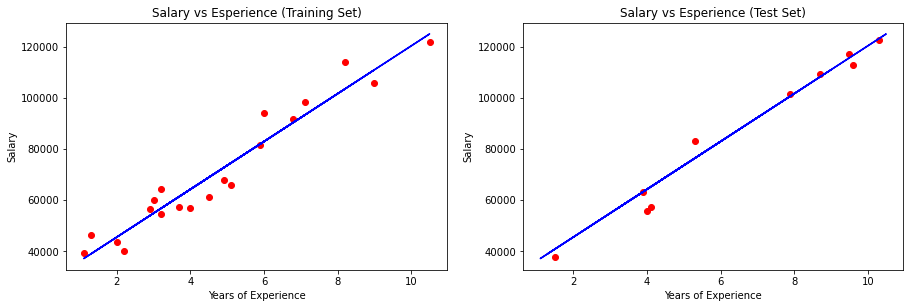

In [32]:
# Visualizing the Training results
plt.subplots(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:,1], y_train, color = 'red') #Pinto en rojo los valores reales de train como puntos
plt.plot(X_train[:,1], model.predict(X_train), color = 'blue') #Pinto en azul y en forma de linea la predicción sobre mis valores de train ya que aplico la regresión sobre esos mismos valores de train, mi modelo entrenado sobre esos valores
plt.title('Salary vs Esperience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
#plt.show()

plt.subplot(2, 2, 2)
plt.scatter(X_test[:,1], y_test, color = 'red') #Pinto ahora los puntos de test sobre el mismo modelo que he construido para validarlo
plt.plot(X_train[:,1], model.predict(X_train), color = 'blue') #Pinto en azul y en forma de linea la predicción sobre mis valores de train ya que aplico la regresión sobre esos mismos valores de train, mi modelo entrenado sobre esos valores
plt.title('Salary vs Esperience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()